In [ ]:
import pandas as pd
from pathlib import Path
X_train = pd.read_csv(Path(r"C:\Users\90553\Documents\ml_data_analysis\data\X_train.csv"),sep=r"\s+")
Y_train = pd.read_csv(Path(r"C:\Users\90553\Documents\ml_data_analysis\data\Y_train.csv"),header=None, names=['category'])
X_test = pd.read_csv(Path(r"C:\Users\90553\Documents\ml_data_analysis\data\X_test.csv"),sep=r"\s+")
Y_test = pd.read_csv(Path(r"C:\Users\90553\Documents\ml_data_analysis\data\Y_test.csv"),header=None, names=['category'])
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(1668, 9635)


,ad,sale,boost,time,warner,profit,quarterli,media,giant,jump,...,Â£339,denialofservic,ddo,seagrav,bot,wirelessli,streamcast,peripher,headphon,flavour
0,1,1,0,0,0,0,0,4,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
Y_train_df = pd.read_csv(
    Path(r"C:\Users\90553\Documents\ml_data_analysis\data\Y_train.csv"), 
    sep=r"\s+", engine="python", encoding="utf-8")
print(Y_train_df.shape)
Y_train_df.head()

(1668, 1)


,categories
0,4
1,1
2,1
3,0
4,0


In [ ]:
labeled_df = pd.concat([X_train_df.reset_index(drop=True), Y_train_df["categories"].reset_index(drop=True)], axis=1)
print(labeled_df.shape)
labeled_df.head()


(1668, 9636)


,ad,sale,boost,time,warner,profit,quarterli,media,giant,jump,...,denialofservic,ddo,seagrav,bot,wirelessli,streamcast,peripher,headphon,flavour,categories
0,1,1,0,0,0,0,0,4,1,0,...,0,0,0,0,0,0,0,0,0,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
binary_df = labeled_df.copy()
binary_df.loc[:, binary_df.columns != "categories"] = (
    binary_df.loc[:, binary_df.columns != "categories"] > 0
).astype(int)
binary_df.head()


,ad,sale,boost,time,warner,profit,quarterli,media,giant,jump,...,denialofservic,ddo,seagrav,bot,wirelessli,streamcast,peripher,headphon,flavour,categories
0,1,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
grouped_doc_counts = binary_df.groupby("categories").agg('sum')
print(grouped_doc_counts.shape)
grouped_doc_counts.head()

(5, 9635)


,ad,sale,boost,time,warner,profit,quarterli,media,giant,jump,...,Â£339,denialofservic,ddo,seagrav,bot,wirelessli,streamcast,peripher,headphon,flavour
categories,,,,,,,,,,,,,,,,,,,,,
0,95,110,64,120,0,77,9,19,61,24,...,0,0,0,0,0,0,0,0,0,0
1,65,45,9,102,5,6,0,22,11,4,...,0,0,0,0,0,0,0,0,0,0
2,108,5,24,137,0,3,1,20,3,3,...,0,0,0,0,0,0,0,0,0,0
3,120,22,15,167,0,0,0,12,5,17,...,0,0,0,0,0,0,0,0,0,0
4,90,50,15,148,6,12,2,72,42,5,...,2,3,3,3,5,1,3,3,3,2


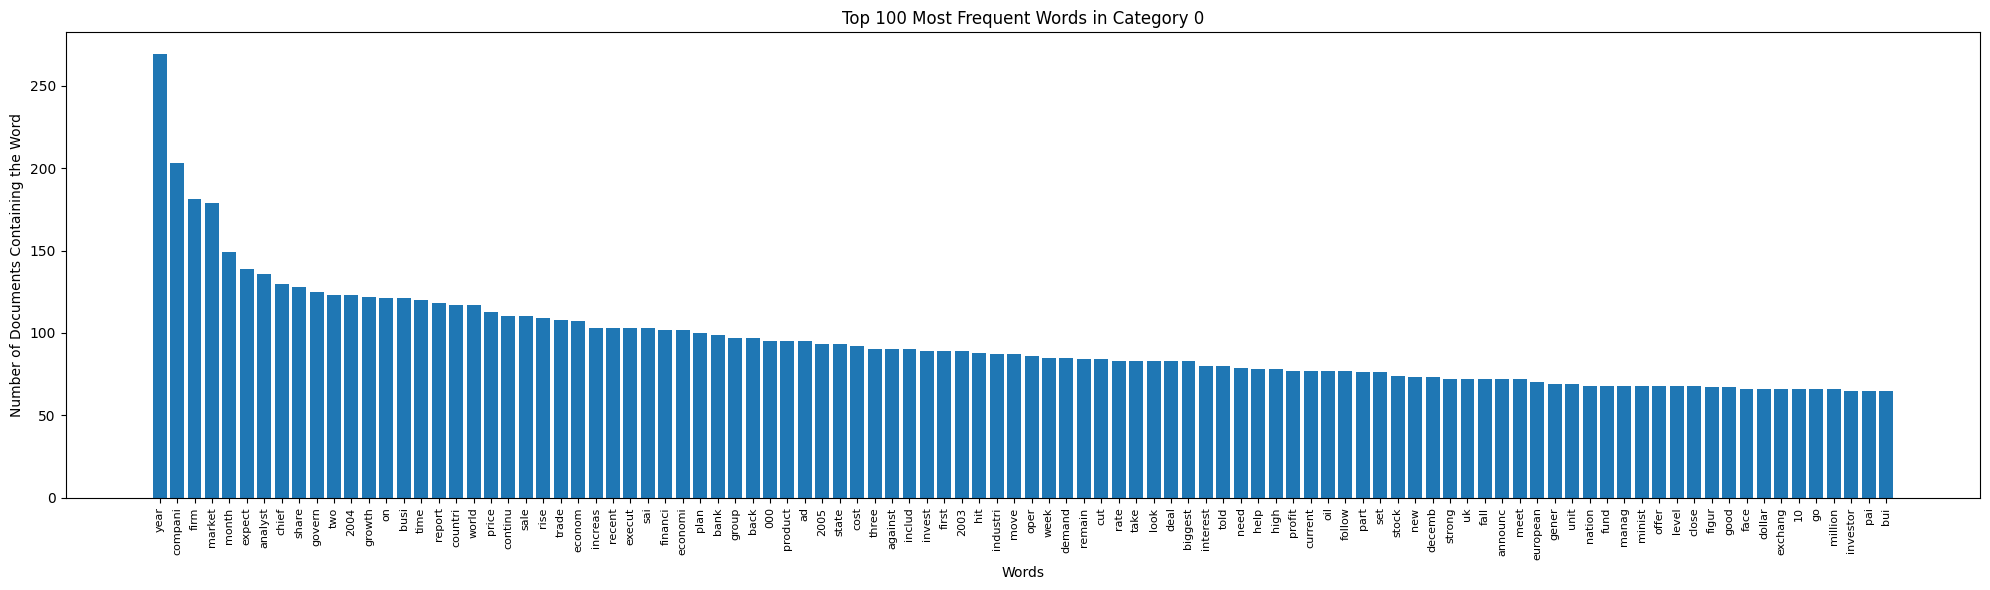

In [23]:
import matplotlib.pyplot as plt

# --- Choose your target category ---
category_id = 0  # change this to whichever category you want

# --- Extract the row for that category ---
word_counts = grouped_doc_counts.reset_index().loc[category_id]

# --- Pick top 100 words ---
top_words = word_counts.sort_values(ascending=False).head(100)

# --- Plot ---
plt.figure(figsize=(20, 6))
plt.bar(top_words.index, top_words.values)
plt.xticks(rotation=90, fontsize=8)
plt.title(f"Top 100 Most Frequent Words in Category {category_id}")
plt.ylabel("Number of Documents Containing the Word")
plt.xlabel("Words")
plt.tight_layout()
plt.show()
